In [6]:
import pandas as pd
import numpy as np
import math
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Naive-Bayes explaination

If we assume that all features are independant then given a certain point x = (x1, x2, ...), we can calculate the probability that the class of x is y_i using Bayes theorem and the fact that we know the probability of y_i given x. This is true for any probabilty funtion  where we can calulate the probability of x given y. In the first example I simply assume that each feature is uniformly distributed according to X, this isn't realistic at all but it shows the idea in it's simplest form (in my opinion). 

### Create the dataset

In [157]:
X, y = make_blobs(n_samples=100, random_state=42, n_features=2, cluster_std=3, centers=3)

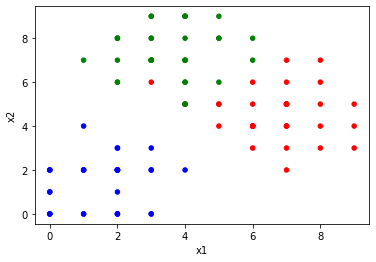

In [158]:
df = pd.DataFrame(X, columns=['x1', 'x2'])

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df = kbins.fit_transform(df)

df = pd.DataFrame(df, columns=['x1', 'x2'])

df['y'] = y

col = df['y'].map({1:'r', 2:'b', 0:'g'})

df.plot(kind='scatter', x='x1', y='x2', color=col, subplots=True, legend=True)

X = df[['x1', 'x2']]
y = df['y']

In [161]:
df.head()

,x1,x2,y
0,1.0,0.0,2
1,8.0,3.0,1
2,3.0,8.0,0
3,9.0,3.0,1
4,2.0,2.0,2


### Assumptions:

    1. x1 and x2 are independant.
    
    2. P(y=2|x1=1) = 3/4, this is because 3 of the 4 points where x1 = 1 are of class 2 (this is the unrealistic uniformdistribution assumption that I was on about).

### Define the class

In [162]:
class NB():
    def __init__(self):
        self.y = pd.Series(dtype=float)
        self.X = pd.DataFrame()
        
    def fit(self, X, y):
        self.y = pd.Series(y)
        self.X = pd.DataFrame(X)
        
    def predict(self, array):
        classes = pd.Series(self.y).unique()
        result_list = []
        for x in array:
            y_list = []
            for y_i in classes:
                prob = y[y==y_i].shape[0]/y.shape[0]
                for i, x_i in enumerate(x):
                    prob *= (self.X[(self.y == y_i) & (self.X.iloc[:, i] == x_i)].shape[0] / self.X[(self.y == y_i)].shape[0])
                y_list.append((y_i, prob))
            result_list.append(max(y_list, key=lambda x: x[1])[0])
        return result_list

In [164]:
model =  NB()

model.fit(X, y)

model.predict([[3,7], [2, 3], [7, 3]])

[0, 2, 1]